In [1]:
#setting up the enviroment with proper packages and backgrounds
!conda config --add channels conda-forge
!conda install -y libsndfile
!conda install pywt 
!conda install soundfile 
!conda install librosa

Solving environment: done

# All requested packages already installed.

Solving environment: failed

PackagesNotFoundError: The following packages are not available from current channels:

  - pywt

Current channels:

  - https://conda.anaconda.org/conda-forge/linux-64
  - https://conda.anaconda.org/conda-forge/noarch
  - https://repo.anaconda.com/pkgs/main/linux-64
  - https://repo.anaconda.com/pkgs/main/noarch

To search for alternate channels that may provide the conda package you're
looking for, navigate to

    https://anaconda.org

and use the search bar at the top of the page.


Solving environment: failed

PackagesNotFoundError: The following packages are not available from current channels:

  - soundfile

Current channels:

  - https://conda.anaconda.org/conda-forge/linux-64
  - https://conda.anaconda.org/conda-forge/noarch
  - https://repo.anaconda.com/pkgs/main/linux-64
  - https://repo.anaconda.com/pkgs/main/noarch

To search for alternate channels that may provide the con

In [ ]:
!conda install soundfile 
!conda install librosa

In [2]:
#import path and systemm libraries 
import os
import sys
import types
import ibm_boto3

#import vector and math and plot libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#import libraries for reading and encrypting file in this case (file.zip)
from io import BytesIO
from zipfile import ZipFile
from botocore.client import Config

#calssification phase train and test with SVM
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

#loading and resamling audio (fil.wav)
import soundfile as sf
import librosa

#for extracting CWT,DWT coefccients 
import pywt

    
%matplotlib inline

The data used for this demonstration comes from the Urban Sounds Dataset. This dataset and its taxonomy is presented in J. Salamon, C. Jacoby and J. P. Bello, A Dataset and Taxonomy for Urban Sound Research, 22nd ACM International Conference on Multimedia, Orlando USA, Nov. 2014.

For simplicity the dataset is sampled and a subset of 20 audio clips from two categories are used - air conditioner (AC) and drill.

In [15]:
def __iter__(self): return 0

#
# INSERT YOUR CONNECTION TO audio_data.zip HERE
# USE Insert StreamingBody object
import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

streaming_body_3 = client_338b0f796bb44a8daaeb8a05ee9a918b.get_object(Bucket='cwt-donotdelete-pr-7m2e3cpmjjj2vm', Key='dataset.zip')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(streaming_body_3, "__iter__"): streaming_body_3.__iter__ = types.MethodType( __iter__, streaming_body_3 ) 
#

data_bytes = BytesIO(streaming_body_3.read())
zip_file = ZipFile(data_bytes)

In [4]:
ZipFile.namelist(zip_file)

['dataset/',
 'dataset/pain/',
 'dataset/pain/spkr09_M_S1d_cry12.wav',
 'dataset/pain/spkr28_M_S1d_cry12.wav',
 'dataset/discomfortb/',
 'dataset/discomfortb/spkr05_M_S1b_cry07.wav',
 'dataset/discomfortb/spkr06_M_S1b_cry01.wav',
 'dataset/discomfortb/spkr06_M_S2b_cry14.wav',
 'dataset/discomfortb/spkr09_M_S1b_cry09.wav',
 'dataset/discomfortb/spkr14_M_S1b_cry04.wav',
 'dataset/discomfortb/spkr25_M_S1b_cry07.wav',
 'dataset/discomfortb/spkr28_M_S1b_cry09.wav',
 'dataset/discomfortb/spkr29_M_S1b_cry07.wav']

In [5]:
#reading data files informationn
audio_data = []
labels = []
sampling_rate = []
file_names = []

for file_name in ZipFile.namelist(zip_file):
    # Skip directories
    if not os.path.basename(file_name):
        continue
    
    audio_file = None
    if file_name.startswith("dataset/pain/"):
        labels.append(0)
        audio_file = zip_file.open(file_name)
    elif file_name.startswith("dataset/discomfortb/"):
        labels.append(1)
        audio_file = zip_file.open(file_name)
    else:
        print("Unknown file class. Skipping.")

    if audio_file is not None:
        file_names.append(file_name)
        tmp = BytesIO(audio_file.read())
        data, samplerate = sf.read(tmp)
        audio_data.append(data)
        sampling_rate.append(samplerate)   

In [6]:
#reaspmling all data into one sapling rate for next process(for this part librosa=0.6.3 can run,if you already have processed data no need for this step)
for index in range(len(audio_data)):
    
    if (sampling_rate[index] == 48000):
        audio_data[index] = librosa.resample(audio_data[index], 48000, 44100)
        sampling_rate[index] = 44100


ParameterError: Audio buffer is not Fortran-contiguous. Use numpy.asfortranarray to ensure Fortran contiguity.

In [7]:
#tranforme data .wav into mono channel because we can not use els 
def to_mono(data):
    if data.ndim > 1:
        data = np.mean(data, axis=1)
    return data

for index in range(len(audio_data)):
    audio_data[index] = to_mono(audio_data[index])

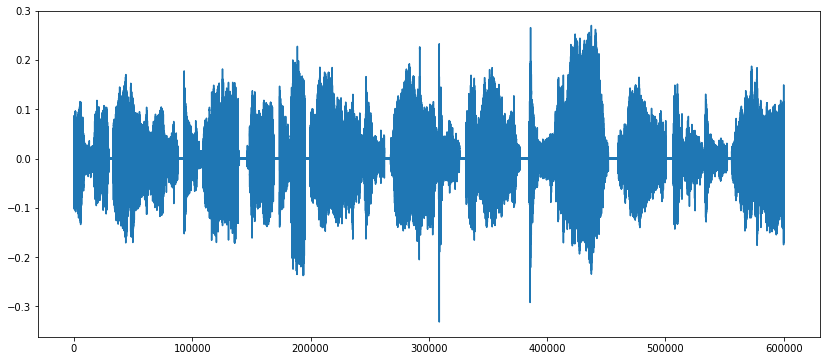

In [8]:
#plot sample 1 from subfile 1
fig = plt.figure(figsize=(14,6))
plt.plot(audio_data[1])

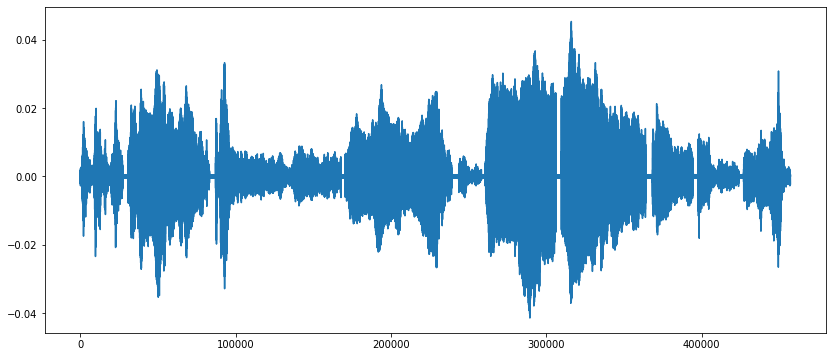

In [9]:
#plot sapmle 4 from subfile 2
fig = plt.figure(figsize=(14,6))
plt.plot(audio_data[4])

In [20]:
# scalling data to use only the needed informations for extracting CWT coefficients (one part'first')
scales = np.arange(1, 101)
coeff1, freqs1 = pywt.cwt(audio_data[1][:25000], scales, 'morl')
coeff2, freqs2 = pywt.cwt(audio_data[4][:25000], scales, 'morl')

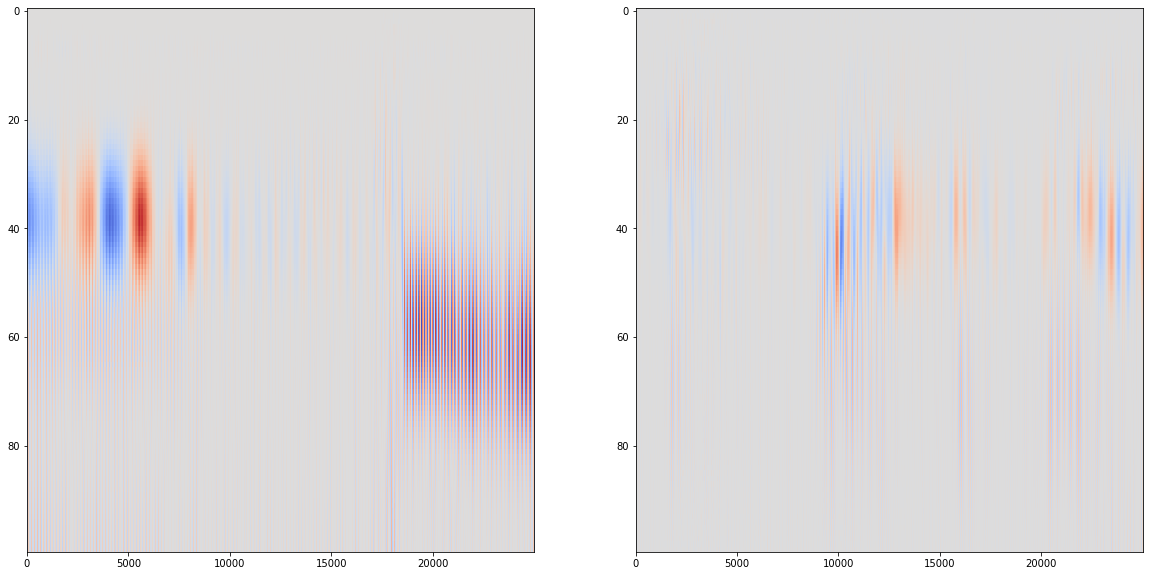

In [21]:
#plot CWT energy
plt.figure(1, figsize=(20,10))
plt.subplot(121)
plt.imshow(coeff1, cmap='coolwarm', aspect='auto')  
plt.subplot(122)
plt.imshow(coeff2, cmap='coolwarm', aspect='auto')  

plt.show() 

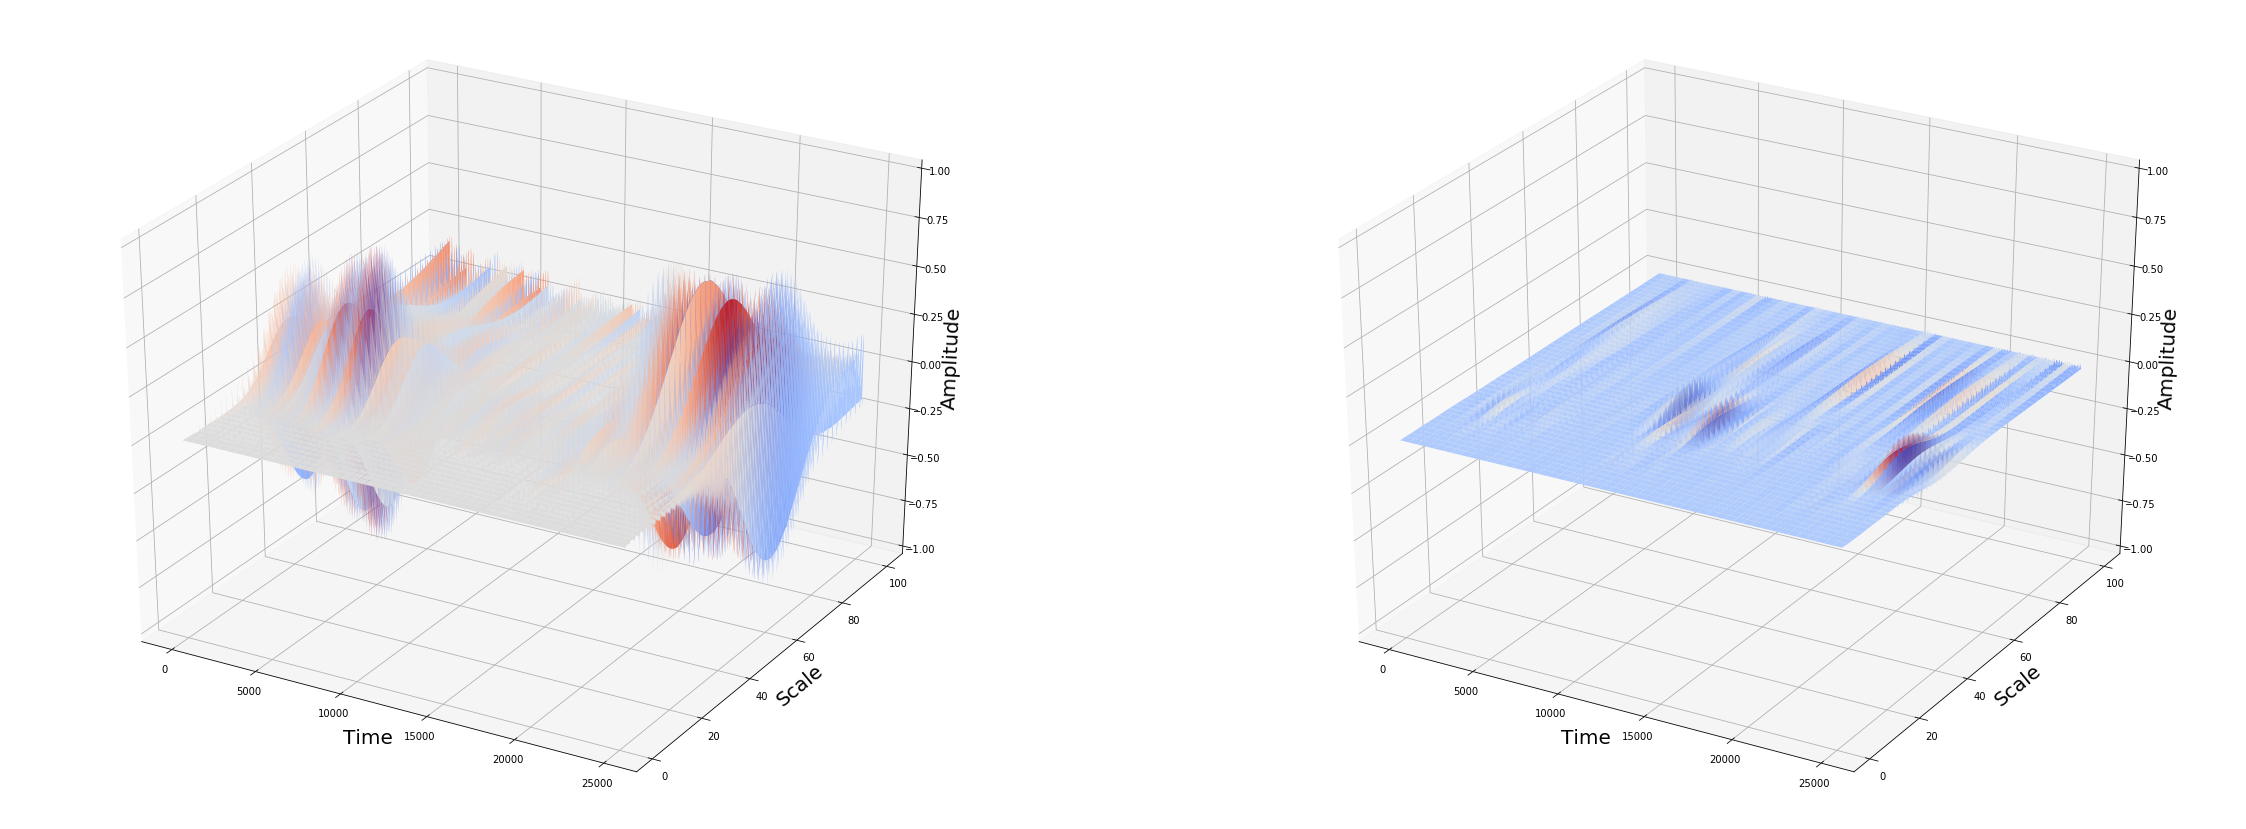

In [23]:
# 3D plot to visualise the power from all angles 
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import numpy as np


fig = plt.figure(figsize=(40,15))

ax1 = fig.add_subplot(1, 2, 1, projection='3d')

Y = np.arange(1, 101, 1)
X = np.arange(1, 25001, 1)

X, Y = np.meshgrid(X, Y)

ax1.plot_surface(X, Y, coeff1, cmap=cm.coolwarm, linewidth=0, antialiased=True)

ax1.set_xlabel("Time", fontsize=20)
ax1.set_ylabel("Scale", fontsize=20)
ax1.set_zlabel("Amplitude", fontsize=20)
ax1.set_zlim3d(-1,1)

ax2 = fig.add_subplot(1, 2, 2, projection='3d')

ax2.plot_surface(X, Y, coeff2, cmap=cm.coolwarm, linewidth=0, antialiased=True)


ax2.set_xlabel("Time", fontsize=20)
ax2.set_ylabel("Scale", fontsize=20)
ax2.set_zlabel("Amplitude", fontsize=20)
ax2.set_zlim3d(-1,1)

plt.show()

In [11]:
# principal coponent analyse reducing vector dimensio 
from sklearn.decomposition import PCA

pca = PCA(n_components=1)

features = np.empty((0,100))

for ind in range(len(audio_data)):
    print('.', end='')
    coeff, freqs = pywt.cwt(audio_data[ind][:25000], scales, 'morl')    
    features = np.vstack([features, pca.fit_transform(coeff).flatten()])


..........

In [12]:
#split data to (20% test,80% train)
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.20, random_state=1234)

In [13]:
#calssification with SVM
clf = svm.SVC()
clf.fit(X_train, y_train)

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [14]:
#predictiong and learning accuracy
y_pred = clf.predict(X_test)
print("Accuracy : %.2f%%" % (accuracy_score(y_test, y_pred) * 100))

Accuracy : 100.00%
